In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set_style('darkgrid')

In [3]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [4]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

# Data Cleaning

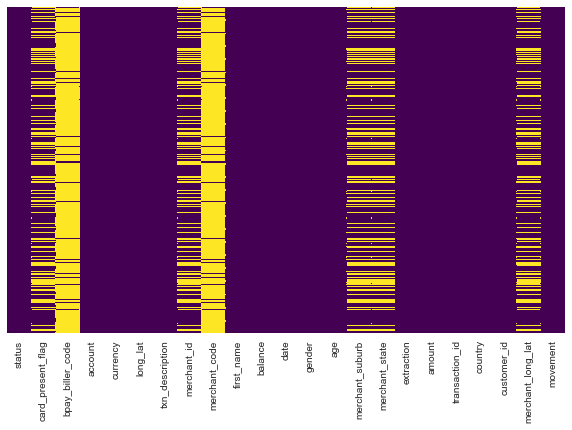

In [6]:
#Plotting null values 
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [7]:
#Removing non-required columns
df.drop(['card_present_flag','bpay_biller_code','currency','long_lat','merchant_code','transaction_id',
         'first_name','extraction','merchant_suburb','country','merchant_long_lat'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   status           12043 non-null  object        
 1   account          12043 non-null  object        
 2   txn_description  12043 non-null  object        
 3   merchant_id      7717 non-null   object        
 4   balance          12043 non-null  float64       
 5   date             12043 non-null  datetime64[ns]
 6   gender           12043 non-null  object        
 7   age              12043 non-null  int64         
 8   merchant_state   7717 non-null   object        
 9   amount           12043 non-null  float64       
 10  customer_id      12043 non-null  object        
 11  movement         12043 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(8)
memory usage: 752.8+ KB


In [9]:
#Checking number of Accounts
df['account'].nunique()

100

In [10]:
df['date'] = pd.to_datetime(df['date'])

In [11]:
#Checking for the days and months of the given data

print('Date: ')
print(df['date'].dt.strftime('%d').unique())
print('Months: ')
print(df['date'].dt.strftime('%m').unique())

Date: 
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '16']
Months: 
['08' '09' '10']


In [12]:
#Adding days and month columns

df['Date'] = df['date'].dt.strftime("%d")
df['Day'] = df['date'].dt.strftime("%a")
df['Month'] = df['date'].dt.strftime("%B")

In [13]:
df.head()

,status,account,txn_description,merchant_id,balance,date,gender,age,merchant_state,amount,customer_id,movement,Date,Day,Month
0,authorized,ACC-1598451071,POS,81c48296-73be-44a7-befa-d053f48ce7cd,35.39,2018-08-01,F,26,QLD,16.25,CUS-2487424745,debit,01,Wed,August
1,authorized,ACC-1598451071,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,21.20,2018-08-01,F,26,NSW,14.19,CUS-2487424745,debit,01,Wed,August
2,authorized,ACC-1222300524,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,5.71,2018-08-01,M,38,NSW,6.42,CUS-2142601169,debit,01,Wed,August
3,authorized,ACC-1037050564,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,2117.22,2018-08-01,F,40,QLD,40.90,CUS-1614226872,debit,01,Wed,August
4,authorized,ACC-1598451071,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,17.95,2018-08-01,F,26,QLD,3.25,CUS-2487424745,debit,01,Wed,August


In [14]:
df.describe()

,balance,age,amount
count,12043.000000,12043.000000,12043.000000
mean,14704.195553,30.582330,187.933588
std,31503.722652,10.046343,592.599934
min,0.240000,18.000000,0.100000
25%,3158.585000,22.000000,16.000000
50%,6432.010000,28.000000,29.000000
75%,12465.945000,38.000000,53.655000
max,267128.520000,78.000000,8835.980000


In [15]:
df.groupby('customer_id')[['balance','amount']].mean()

,balance,amount
customer_id,,
CUS-1005756958,2275.852055,222.862603
CUS-1117979751,9829.929000,339.843700
CUS-1140341822,5699.212250,212.632500
CUS-1147642491,9032.841186,245.600169
CUS-1196156254,22272.433755,147.145796
...,...,...
CUS-72755508,4497.557069,197.213276
CUS-809013380,3756.902903,151.694274
CUS-860700529,3462.276009,77.681888


# Distributions

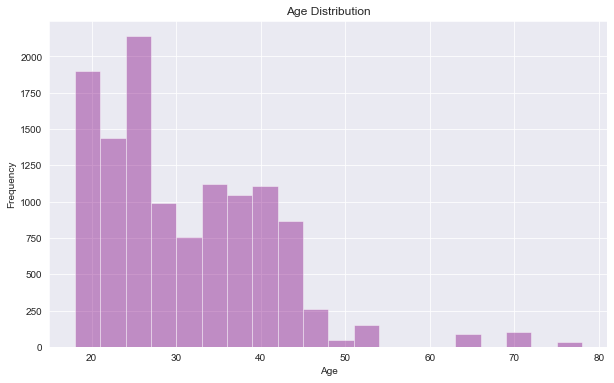

In [16]:
#Age distribution

plt.figure(figsize=(10,6))
sns.distplot(df['age'],bins=20,kde=False,hist=True,color='purple')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

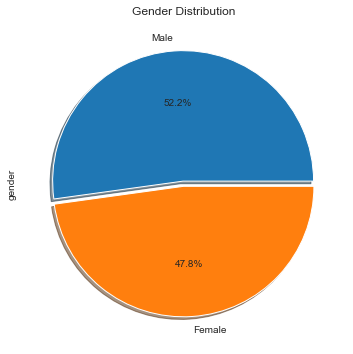

In [17]:
#Gender Distribution

plt.figure(figsize=(6,6))
df['gender'].value_counts().plot.pie(autopct="%1.1f%%",explode=(0.02,0.02),shadow=True,labels=['Male','Female'])
plt.title('Gender Distribution')
plt.show()

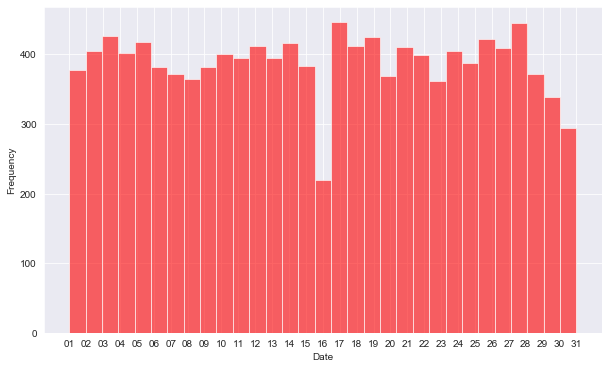

In [18]:
#Distribution of Transactions w.r.t Dates

plt.figure(figsize=(10,6))
plt.hist(np.sort(df['Date']),bins=31,color='red',alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.show()

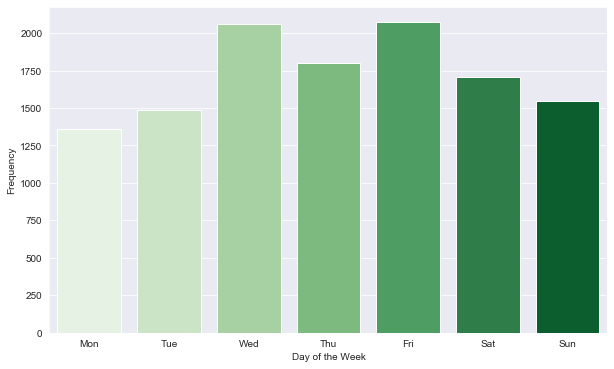

In [19]:
#Distribution of Transactions w.r.t Days

plt.figure(figsize=(10,6))
sns.countplot(x='Day',data=df,order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='Greens')
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.show()

In [20]:
#State wise Merchant distribution
df.groupby('merchant_state')['merchant_id'].count()

merchant_state
ACT      73
NSW    2169
NT      205
QLD    1556
SA      415
TAS      68
VIC    2131
WA     1100
Name: merchant_id, dtype: int64

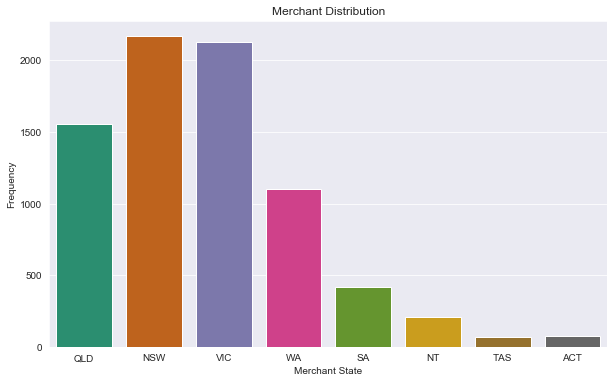

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='merchant_state',data=df,palette='Dark2')
plt.xlabel('Merchant State')
plt.ylabel('Frequency')
plt.title('Merchant Distribution')
plt.show()

# Txn_Description

In [22]:
df['txn_description'].count()

12043

In [23]:
df['txn_description'].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [24]:
df.groupby('txn_description')['customer_id'].count()

txn_description
INTER BANK     742
PAY/SALARY     883
PAYMENT       2600
PHONE BANK     101
POS           3783
SALES-POS     3934
Name: customer_id, dtype: int64

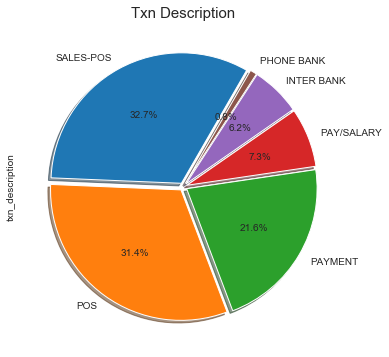

In [25]:
plt.figure(figsize=(6,6))

df['txn_description'].value_counts().plot.pie(autopct="%1.1f%%",shadow=True,explode=np.repeat(0.03,6),startangle=60)
plt.title('Txn Description',fontsize=15)
plt.show()

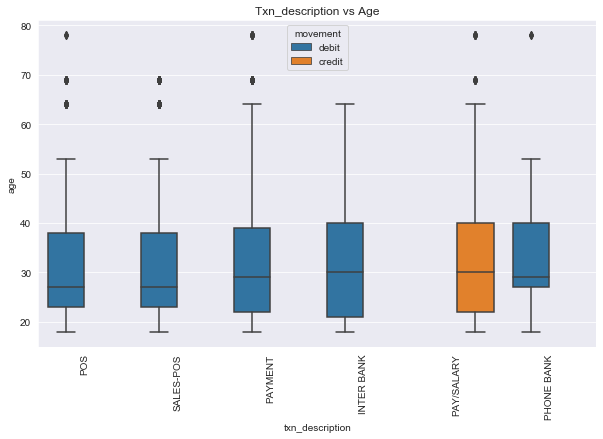

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='txn_description',y='age',data=df,hue='movement')
plt.xticks(rotation=90)
plt.title('Txn_description vs Age')
plt.show()

Only Pay/Salary was the transaction that was credited into customer's account, rest of them were debited from their account

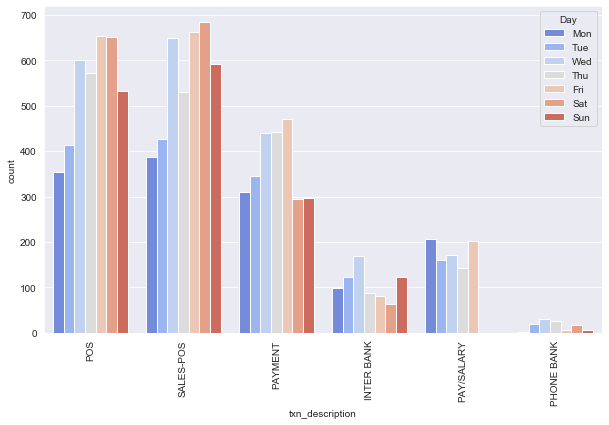

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='txn_description',data=df,hue='Day',hue_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

 - None of the Pay/Salary was credited on Saturday and Sunday.
 - Pay/Salary were credited mostly on the first day of week, i.e on Monday.
 - Except for the Inter Bank transaction, Sunday was the least preferred day for transactions.

# Daily Transactions Stastics

In [28]:
#Mean Transaction Volume

df_date_count = df.groupby("date").count()
trans_vol = df_date_count["customer_id"].mean()
n_points = len(df_date_count.index)

Mean Transaction Volume: 132.34


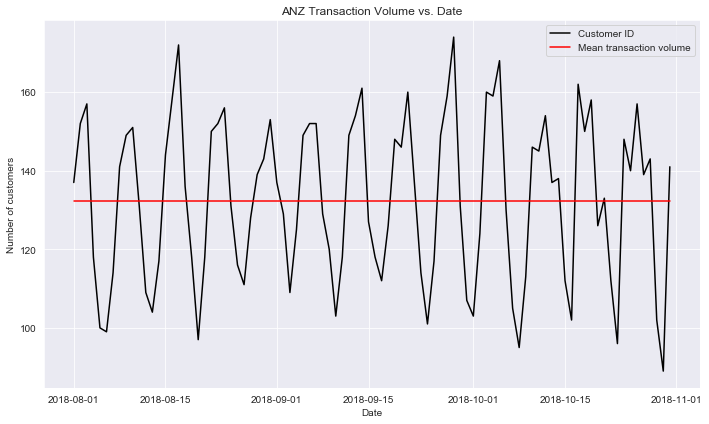

In [29]:
plt.figure(figsize=(10,6))
plt.plot(df_date_count.index, df_date_count["customer_id"], c="black", label = "Customer ID")
plt.plot(df_date_count.index, np.linspace(trans_vol,trans_vol,n_points), c="r", label = "Mean transaction volume")
plt.title("ANZ Transaction Volume vs. Date")
plt.xlabel("Date")
plt.ylabel("Number of customers")
plt.legend()
plt.tight_layout()
print('Mean Transaction Volume:',round(trans_vol,2))

In [30]:
#Mean Transcation Amount

df_date_mean = df.groupby("date").mean()
trans_amt = df_date_mean["amount"].mean()
n_points = len(df_date_count.index)

Mean Transaction Amount: 190.61


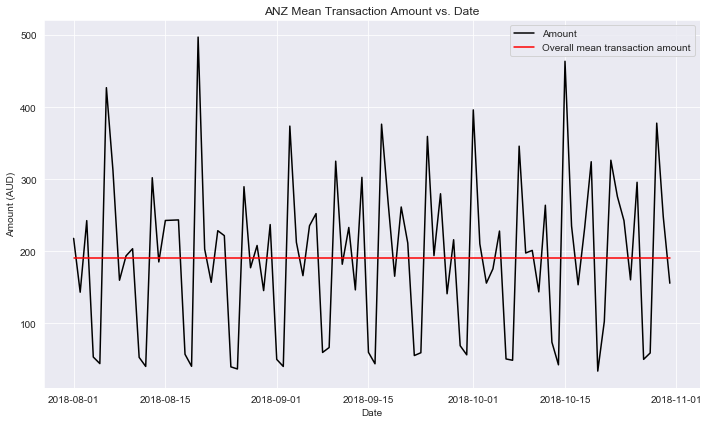

In [31]:
plt.figure(figsize=(10,6))
plt.plot(df_date_count.index, df_date_mean["amount"], c="black", label = "Amount")
plt.plot(df_date_count.index, np.linspace(trans_amt,trans_amt,n_points), c="r", label = "Overall mean transaction amount")
plt.title("ANZ Mean Transaction Amount vs. Date")
plt.xlabel("Date")
plt.ylabel("Amount (AUD)")
plt.legend()
plt.tight_layout()
print('Mean Transaction Amount:',round(trans_amt,2))

# Monthly Transactions Statistics

In [32]:
#August

df_cus_aug = df[df["Month"] == "August"].groupby("customer_id").mean()
df_gen_aug = df[df["Month"] == "August"].groupby("gender").mean()

In [33]:
mean_f_bal_aug = df_gen_aug["balance"].iloc[0]
mean_m_bal_aug = df_gen_aug["balance"].iloc[1]
mean_f_amt_aug = df_gen_aug["amount"].iloc[0]
mean_m_amt_aug = df_gen_aug["amount"].iloc[1]
n_points = len(df_cus_aug["age"])
print('Mean balance for female customers:',round(mean_f_bal_aug,2))
print('Mean balance for male customers:',round(mean_m_bal_aug,2))
print('Mean amount for female customers:',round(mean_f_amt_aug,2))
print('Mean amount for male customers:',round(mean_m_amt_aug,2))

Mean balance for female customers: 7443.95
Mean balance for male customers: 13906.69
Mean amount for female customers: 162.93
Mean amount for male customers: 205.74


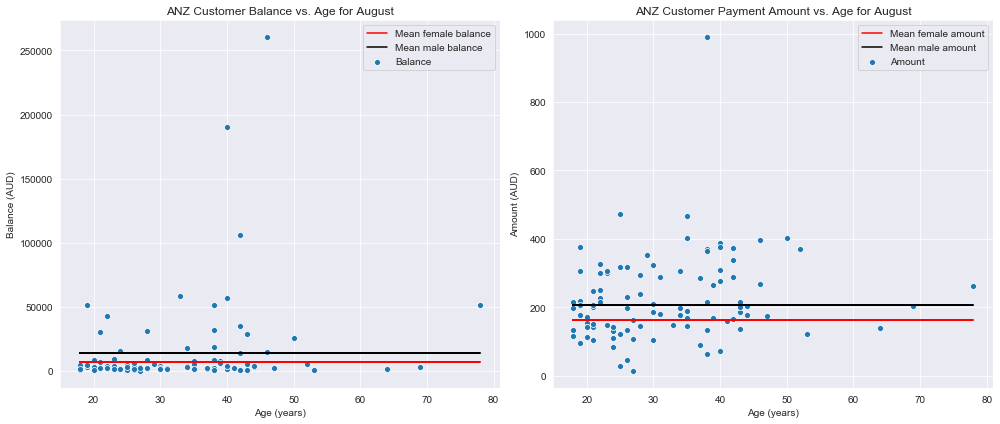

In [34]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='age',y='balance',data=df_cus_aug,label='Balance')
plt.plot(df_cus_aug["age"], np.linspace(mean_f_bal_aug,mean_f_bal_aug,n_points), c="red", label = "Mean female balance")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_bal_aug,mean_m_bal_aug,n_points), c="black", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Balance (AUD)")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x='age', y = 'amount',data = df_cus_aug,label="Amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_f_amt_aug,mean_f_amt_aug,n_points), c="red", label = "Mean female amount")
plt.plot(df_cus_aug["age"], np.linspace(mean_m_amt_aug,mean_m_amt_aug,n_points), c="black", label = "Mean male amount")
plt.title("ANZ Customer Payment Amount vs. Age for August")
plt.xlabel("Age (years)")
plt.ylabel("Amount (AUD)")
plt.legend()

plt.tight_layout()

In [35]:
#September

df_cus_sep = df[df["Month"] == "September"].groupby("customer_id").mean()
df_gen_sep = df[df["Month"] == "September"].groupby("gender").mean()

In [36]:
mean_f_bal_sep = df_gen_sep["balance"].iloc[0]
mean_m_bal_sep = df_gen_sep["balance"].iloc[1]
mean_f_amt_sep = df_gen_sep["amount"].iloc[0]
mean_m_amt_sep = df_gen_sep["amount"].iloc[1]
n_points = len(df_cus_sep["age"])
print('Mean balance for female customers:',round(mean_f_bal_sep,2))
print('Mean balance for male customers:',round(mean_m_bal_sep,2))
print('Mean amount for female customers:',round(mean_f_amt_sep,2))
print('Mean amount for male customers:',round(mean_m_amt_sep,2))

Mean balance for female customers: 13010.55
Mean balance for male customers: 16309.19
Mean amount for female customers: 163.19
Mean amount for male customers: 199.36


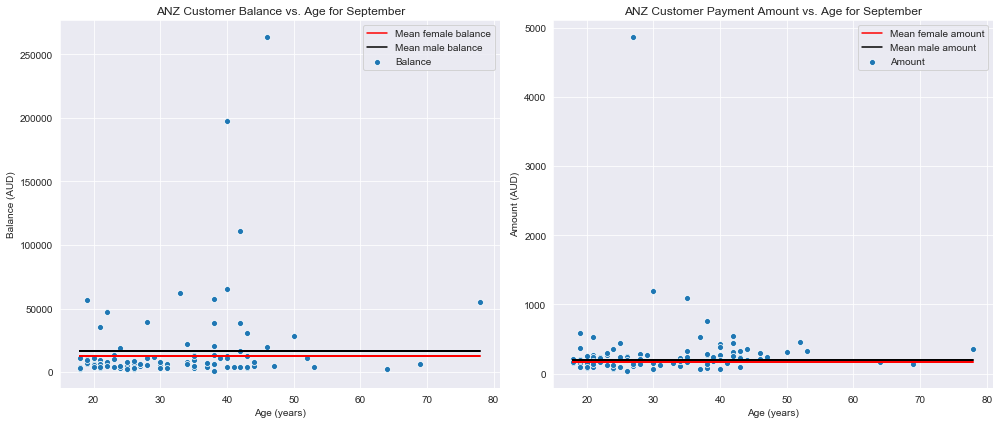

In [37]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='age',y='balance',data=df_cus_sep,label='Balance')
plt.plot(df_cus_sep["age"], np.linspace(mean_f_bal_sep,mean_f_bal_sep,n_points), c="red", label = "Mean female balance")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_bal_sep,mean_m_bal_sep,n_points), c="black", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Balance (AUD)")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x='age', y = 'amount',data = df_cus_sep,label="Amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_f_amt_sep,mean_f_amt_sep,n_points), c="red", label = "Mean female amount")
plt.plot(df_cus_sep["age"], np.linspace(mean_m_amt_sep,mean_m_amt_sep,n_points), c="black", label = "Mean male amount")
plt.title("ANZ Customer Payment Amount vs. Age for September")
plt.xlabel("Age (years)")
plt.ylabel("Amount (AUD)")
plt.legend()

plt.tight_layout()

In [38]:
#October

df_cus_oct = df[df["Month"] == "October"].groupby("customer_id").mean()
df_gen_oct = df[df["Month"] == "October"].groupby("gender").mean()

In [39]:
mean_f_bal_oct = df_gen_oct["balance"].iloc[0]
mean_m_bal_oct = df_gen_oct["balance"].iloc[1]
mean_f_amt_oct = df_gen_oct["amount"].iloc[0]
mean_m_amt_oct = df_gen_oct["amount"].iloc[1]
n_points = len(df_cus_oct["age"])
print('Mean balance for female customers:',round(mean_f_bal_oct,2))
print('Mean balance for male customers:',round(mean_m_bal_oct,2))
print('Mean amount for female customers:',round(mean_f_amt_oct,2))
print('Mean amount for male customers:',round(mean_m_amt_oct,2))

Mean balance for female customers: 15644.69
Mean balance for male customers: 20981.75
Mean amount for female customers: 179.27
Mean amount for male customers: 211.9


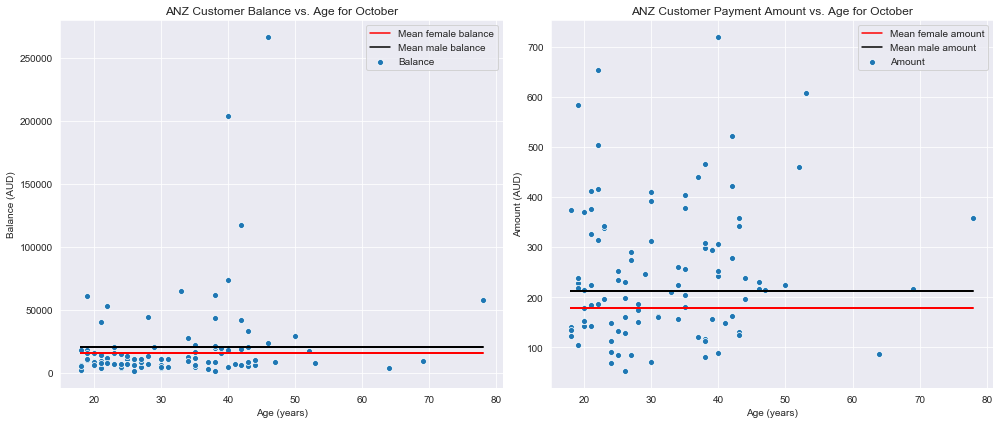

In [40]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.scatterplot(x='age',y='balance',data=df_cus_oct,label='Balance')
plt.plot(df_cus_oct["age"], np.linspace(mean_f_bal_oct,mean_f_bal_oct,n_points), c="red", label = "Mean female balance")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_bal_oct,mean_m_bal_oct,n_points), c="black", label = "Mean male balance")
plt.title("ANZ Customer Balance vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Balance (AUD)")
plt.legend()

plt.subplot(1,2,2)
sns.scatterplot(x='age', y = 'amount',data = df_cus_oct,label="Amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_f_amt_oct,mean_f_amt_oct,n_points), c="red", label = "Mean female amount")
plt.plot(df_cus_oct["age"], np.linspace(mean_m_amt_oct,mean_m_amt_oct,n_points), c="black", label = "Mean male amount")
plt.title("ANZ Customer Payment Amount vs. Age for October")
plt.xlabel("Age (years)")
plt.ylabel("Amount (AUD)")
plt.legend()

plt.tight_layout()